In [1]:
import DataLoader
import importlib
import pandas as pd
import CoverageHelper
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr


%matplotlib inline
importlib.reload(DataLoader)
coverage_df = DataLoader.load_csv_coverage()
test_graph_df = DataLoader.load_csv_test_graphs()
stat_trans_act_graph_df = DataLoader.load_csv_stat_graph("-act-transitive")

Number of apps: 
412


Number of apps: 
412


Total covered methods:
4071528


Everything is good!


Total entries:
2088


Total entries:
41163


In [2]:

importlib.reload(CoverageHelper)

<module 'CoverageHelper' from 'C:\\Master\\Thesis\\IncubatorDataAnalyser\\CoverageHelper.py'>

Coverage_report

In [2]:
test_graph_df.head()

,source,target,action,widget_id,widget,strategy,app
0,com.monotype.android.font.free.MainActivity_,com.monotype.android.font.free.SurveyActivity_,click,1.690831e+07,android.support.v7.widget.h,systematic,com.monotype.android.font.free.fifty.written
1,com.monotype.android.font.free.MainActivity_,com.monotype.android.font.free.SurveyActivity_,clickMenuItem,2.131624e+09,android.support.v7.view.menu.ActionMenuItemView,systematic,com.monotype.android.font.free.fifty.written
2,com.google.android.gms.ads.AdActivity,com.monotype.android.font.free.MainActivity_,back,NaN,NaN,random,com.monotype.android.font.free.fifty.written
3,com.tns.NativeScriptActivity,NaN,NaN,NaN,NaN,systematic,com.swyftinteractive.fuelguy
4,com.tns.NativeScriptActivity,NaN,NaN,NaN,NaN,random,com.swyftinteractive.fuelguy


In [3]:
systematic_block_coverage = CoverageHelper.calc_coverage(CoverageHelper.filter("block", "systematic", coverage_df))
systematic_block_coverage.describe()

count    412.000000
mean      19.080868
std       18.358747
min        0.000000
25%        5.491374
50%       13.604061
75%       27.942011
max      100.000000
Name: percentage_covered, dtype: float64

In [4]:
random_block_coverage = CoverageHelper.calc_coverage(CoverageHelper.filter("block", "random", coverage_df))
random_block_coverage.describe()

count    412.000000
mean      20.279443
std       18.564002
min        0.000000
25%        6.465338
50%       14.102564
75%       30.411555
max      100.000000
Name: percentage_covered, dtype: float64

In [24]:
diff_coverage = random_block_coverage - systematic_block_coverage
diff_coverage = diff_coverage.to_frame("diff_coverage")
diff_coverage.sort_values(by="diff_coverage", ascending=True)

,diff_coverage
app,
com.monotype.android.font.handwritefontstylefree,-42.345277
com.t2ksports.wwe2k16CS,-19.652112
com.monotype.android.font.fiftyfontsforsgtwelve,-17.915309
com.draw_Graffiti.draw,-17.497207
pw.thedrhax.mosmetro,-17.337461
com.newspress.hurricanehub,-13.674165
com.dic_o.dico_eng_spa,-12.418175
com.autovindecoder,-11.290834
com.freerecipes.detoxdrinks,-11.001372


In [11]:
valid_test_graph = test_graph_df[(test_graph_df.source != "com.google.android.gms.ads.AdActivity") &
                                 (test_graph_df.target != "com.google.android.gms.ads.AdActivity") &
                                 (test_graph_df.source != "com.startapp.android.publish.OverlayActivity") &
                                 (test_graph_df.target != "com.startapp.android.publish.OverlayActivity") &
                                 (test_graph_df.action != "back")]

valid_test_graph = test_graph_df

valid_test_graph.drop_duplicates().groupby(["strategy", "app"]).count().head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>source</th>
      <th>target</th>
      <th>action</th>
      <th>widget_id</th>
      <th>widget</th>
    </tr>
    <tr>
      <th>strategy</th>
      <th>app</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">random</th>
      <th>alex.map.maps</th>
      <td>5</td>
      <td>5</td>
      <td>5</td>
      <td>2</td>
      <td>2</td>
    </tr>
    <tr>
      <th>androidlab.carlog</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>appinventor.ai_agiapplications.CountYourSteps</th>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <th>asp.aniemo.pack6.ext</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>bestfreelivewallpapers.funny_photo_editor</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

In [12]:
random_coverage_with_test_graph = valid_test_graph[(valid_test_graph.strategy == "random")].drop(
    'strategy', 1).groupby("app").count()
systematic_coverage_with_test_graph = valid_test_graph[
    (valid_test_graph.strategy == "systematic")].drop('strategy', 1).groupby("app").count()

,edges_random,edges_systematic
count,412.000000,412.000000
mean,2.504854,1.580097
std,3.778860,2.823415
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,4.000000,2.000000
max,26.000000,18.000000


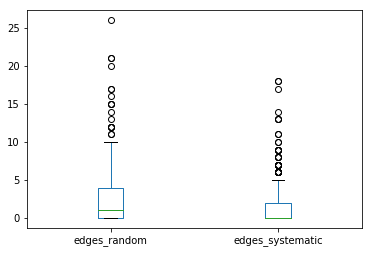

In [13]:
boxplot_df_edges = pd.DataFrame()
boxplot_df_edges["edges_random"] = random_coverage_with_test_graph.target
boxplot_df_edges["edges_systematic"] = systematic_coverage_with_test_graph.target
boxplot_df_edges.plot.box()
plt.savefig("./data/boxplot-edges.pdf", dpi=1200)
boxplot_df_edges.describe()

In [14]:
diff_in_graph_per_app = random_coverage_with_test_graph['target'] - systematic_coverage_with_test_graph['target']
diff_in_graph_per_app = diff_in_graph_per_app.to_frame("edges").dropna()
diff_in_graph_per_app.head()

,edges
app,
alex.map.maps,4
androidlab.carlog,0
appinventor.ai_agiapplications.CountYourSteps,1
asp.aniemo.pack6.ext,0
bestfreelivewallpapers.funny_photo_editor,0


C:\Master\Thesis\IncubatorDataAnalyser\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.28795927814871364, 2.6206750093169726e-09)

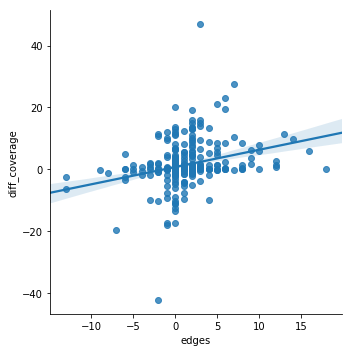

In [15]:
diff_result = pd.concat([diff_in_graph_per_app, diff_coverage], axis=1, sort=False).dropna()
sns.lmplot(x='edges', y='diff_coverage', data=diff_result, fit_reg=True)
plt.savefig("./data/scatterplot-diff-edges-diff-coverage.pdf", dpi=1200)
diff_result.describe()
pearsonr(diff_result.edges, diff_result.diff_coverage)


In [16]:
number_of_unique_screens_per_app = valid_test_graph[['strategy', 'app', 'source', 'target']].melt(
    id_vars=['strategy', 'app'])

number_of_unique_screens_per_app.head()

,strategy,app,variable,value
0,systematic,com.mynamecubeapps.jewel,source,com.mynamecubeapps.jewel.DesktopActivity
1,random,com.mynamecubeapps.jewel,source,com.mynamecubeapps.jewel.DesktopActivity
2,random,com.mynamecubeapps.jewel,source,com.mynamecubeapps.jewel.DesktopActivity
3,random,com.mynamecubeapps.jewel,source,com.mynamecubeapps.jewel.DesktopActivity
4,random,com.mynamecubeapps.jewel,source,com.mynamecubeapps.jewel.Preferences


In [17]:
ran_n = number_of_unique_screens_per_app[(number_of_unique_screens_per_app.strategy == 'random')].drop(['strategy'],
                                                                                                       axis=1)
sys_n = number_of_unique_screens_per_app[(number_of_unique_screens_per_app.strategy == 'systematic')].drop(['strategy'],
                                                                                                           axis=1)

,screens_random,screens_systematic
count,412.000000,412.000000
mean,2.233010,1.691748
std,1.547017,0.919976
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,1.000000
75%,3.000000,2.000000
max,10.000000,6.000000


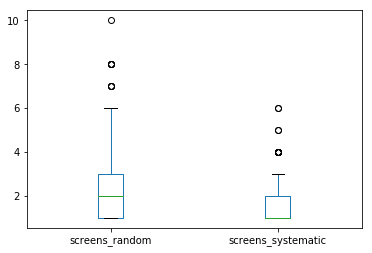

In [18]:
boxplot_df_screens = pd.DataFrame()
boxplot_df_screens["screens_random"] = ran_n.groupby(['app']).value.nunique()
boxplot_df_screens["screens_systematic"] = sys_n.groupby(['app']).value.nunique()
boxplot_df_screens.plot.box()
plt.savefig("./data/boxplot-screens.pdf", dpi=1200)
boxplot_df_screens.describe()

In [19]:
diff_in_unique_screens = (ran_n.groupby(['app']).value.nunique() - sys_n.groupby(['app']).value.nunique()).dropna()
diff_in_unique_screens.head()

app
alex.map.maps                                    1
androidlab.carlog                                0
appinventor.ai_agiapplications.CountYourSteps    1
asp.aniemo.pack6.ext                             0
bestfreelivewallpapers.funny_photo_editor        0
Name: value, dtype: int64

C:\Master\Thesis\IncubatorDataAnalyser\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.37015593656325585, 7.963741482490858e-15)

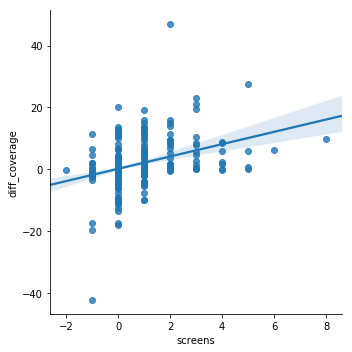

In [20]:
diff_result = pd.concat([diff_in_unique_screens.to_frame("screens"), diff_coverage], axis=1, sort=False).dropna()
# sns.lmplot(x='screens', y='diff_coverage', data=diff_result, fit_reg=True, x_estimator=np.mean)
# sns.lmplot(x='screens', y='diff_coverage', data=diff_result, x_jitter=0.05)
sns.lmplot(x='screens', y='diff_coverage', data=diff_result)
plt.savefig("./data/scatterplot-diff-screens-diff-coverage.pdf", dpi=1200)
diff_result.describe()
pearsonr(diff_result.screens, diff_result.diff_coverage)


In [62]:
# # total_screens_stat =
# number_of_unique_screens_per_app_stat = stat_trans_act_graph_df[['app', 'source', 'target']].melt(
#     id_vars=['app'])
# 
# number_of_unique_screens_per_app_stat.head()
# 
# stat_trans_act_graph_df.app.nunique()


In [63]:
# number_of_unique_screens_per_app_stat.groupby("app").value.count().head()

In [64]:
# random_unique_screens_found_percentage = pd.DataFrame()
# random_unique_screens_found_percentage['screens_found'] = ran_n.groupby(['app']).value.nunique() / number_of_unique_screens_per_app_stat.groupby("app").value.count() * 100
# # random_unique_screens_found_percentage[]
# random_unique_screens_found_percentage.count()
# # random_unique_screens_found_percentage.sort_values(by="diff_screens", ascending=False).head()

In [65]:
# systematic_unique_screens_found_percentage = sys_n.groupby(['app']).value.nunique() / number_of_unique_screens_per_app_stat.groupby("app").value.count() * 100
# systematic_unique_screens_found_percentage = systematic_unique_screens_found_percentage.to_frame("screens_found")
# systematic_unique_screens_found_percentage.head()

In [66]:
# diff_screen_found_percentage = (random_unique_screens_found_percentage - systematic_unique_screens_found_percentage).dropna()
# diff_screen_found_percentage.head()

In [67]:
# random_edges_percentage = pd.DataFrame()
# random_edges_percentage['edges_found'] = random_coverage_with_test_graph['target'] / stat_trans_act_graph_df.groupby("app").count()["target"] *100
# random_edges_percentage.head()

In [68]:
# systematic_edges_percentage = pd.DataFrame()
# systematic_edges_percentage['edges_found'] = systematic_coverage_with_test_graph['target'] / stat_trans_act_graph_df.groupby("app").count()["target"] *100
# systematic_edges_percentage.head()

In [69]:
# diff_edges_found_percentage = (random_edges_percentage - systematic_edges_percentage).dropna()
# diff_edges_found_percentage.head()

In [70]:
# diff_result = pd.concat([diff_edges_found_percentage, diff_in_coverage_per_app.to_frame()], axis=1, sort=False)
# diff_result.plot.scatter(x="edges_found", y="coverage")
# diff_result.head()


In [61]:
# diff_result = pd.concat([diff_screen_found_percentage, diff_in_coverage_per_app.to_frame()], axis=1, sort=False)
# diff_result.plot.scatter(x="screens_found", y="coverage")
# diff_result.head()

